# **Best-Wings Airlines Data Analysis**

Vice-President of Best-Wings Airlines is concerned about the reviews of its services the company has received in the last 5 years. These reviews are below industry average and have led customers to being either neutral or dissatisfied with the services. Initial analysis states that 49% of company's customers are Neutral/Dissatisfied and this needs to be improved. 

VP has asked the data analytics team for a thorough analysis of the data that will demonstrate visual analysis, statistical analysis and develop a few prediction models that will best suit the data and predict customers' satisfaction. After selecting the best model, he also wants to know top 3 services that contribute towards customers' dissatisfaction so that other departments can know which services should be prioritized in terms of improvement.  

Below is the thorough analysis with tasks performed and insights on the data. The analysis is segregated into 8 components.

***1. Import Libraries***

***2. Data Cleaning***

***3. Statistical Analysis***

***4. Classification Method 1: Logistic Regression & Probability Prediction*** 

***5. Classification Method 2: Decision Tree & Probability Prediction***

***6. Classification Feature Importance***

***7. Add Noise (random data) to the original data***

***8. Conclusion***

### 1. Import Libraries

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as skl
import sklearn.linear_model as lm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

###  2. Data Cleaning

* Added a new column with binary values based on values in satisfaction_v2 column. Satisfied = 0, Dissatisfied = 1
* Converted values in 'id' column to string
* Removed unwanted rows. Filtered out values in column 'Age' that are less than 18. Assumption here is that people over age 18 are generally considered adults 
* Removed unwanted columns: 'Customer Type' and 'satisfaction_v2'
* Replaced 'NA' values with 0
* Cleaned dataframe is named df_cleaned
    

In [3]:
df_rawdata = pd.read_csv('Airline Satisfaction Data.csv')  
df_rawdata['Satisfied or Dissatisfied'] = df_rawdata['satisfaction_v2'].apply(lambda x: 1 if x == 'neutral or dissatisfied' else 0)  
df_cleaned = df_rawdata.drop(df_rawdata[df_rawdata.Age < 18].index)
df_cleaned = df_cleaned.drop(['satisfaction_v2', 'Customer Type'], axis = 1) #removing unwanted column#
df_cleaned['id'] = df_cleaned['id'].astype(str) #converting values in 'id' column to string#
df_cleaned.fillna(0)

,id,Gender,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied or Dissatisfied
0,11112,Female,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,0
1,110278,Male,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,0
3,47462,Female,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,0
4,120011,Female,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,0
5,100744,Male,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,Female,29,Personal Travel,Eco,1731,5,5,5,3,...,2,3,3,4,4,4,2,0,0.0,0
129876,97768,Male,63,Personal Travel,Business,2087,2,3,2,4,...,3,2,3,3,1,2,1,174,172.0,1
129877,125368,Male,69,Personal Travel,Eco,2320,3,0,3,3,...,4,4,3,4,2,3,2,155,163.0,1
129878,251,Male,66,Personal Travel,Eco,2450,3,2,3,2,...,3,3,2,3,2,1,2,193,205.0,1


### 3. Statistical Analysis

***Tasks***
* Determined Independent Variables: Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding
* Determined Dependent Variable: Satisfied or Dissatisfied
* Bar plot of count of reviews for each independent variable
* Calculated Descriptive Statistics
* Calculated IQR
* Heatmap of correlation coefficients of other variables with respect to target variable 'Satisfied or Dissatisfied'
* Bar plot of correlation coefficients


***Insights***

* Cleanliness is the best rated service since it has the highest average rating of 3.70, followed by Baggage handling 3.69 and Online Support 3.54
* Seat comfort, Food & Drink and Departure/Arrival time convenient have the lowest average ratings among all other services
* From the IQR, we can see that for most of the services, 50% of customers have given a rating of 2
* From the correlation matrix (heatmap), we can conclude that most of the variables except Departure/Arrival Time Convenient and Gate location are negatively correlated with our target variable. Inflight Entertainment has the strongest negative correlation among all


In [772]:
df_hist

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
Reviews,,,,,,,,,,,,,,
0,4395,6263,5366,2,112,2544,1,17,5,427,0.0,1,5,13
1,19468,19510,19610,21011,13382,10682,12447,12179,12091,10161,7530.0,14134,7298,13981
2,26567,21304,25051,22802,24972,17432,15598,18237,15916,19923,12633.0,14230,12646,16859
3,26838,21557,25905,30604,25479,22246,19911,20588,24662,20568,22382.0,32960,21948,28589
4,26121,26964,25099,27612,29240,39060,38869,37170,37710,37078,44334.0,33657,44852,32769
5,16644,24435,19002,18002,26848,28069,33207,31842,29649,31876,33154.0,25051,33284,27822


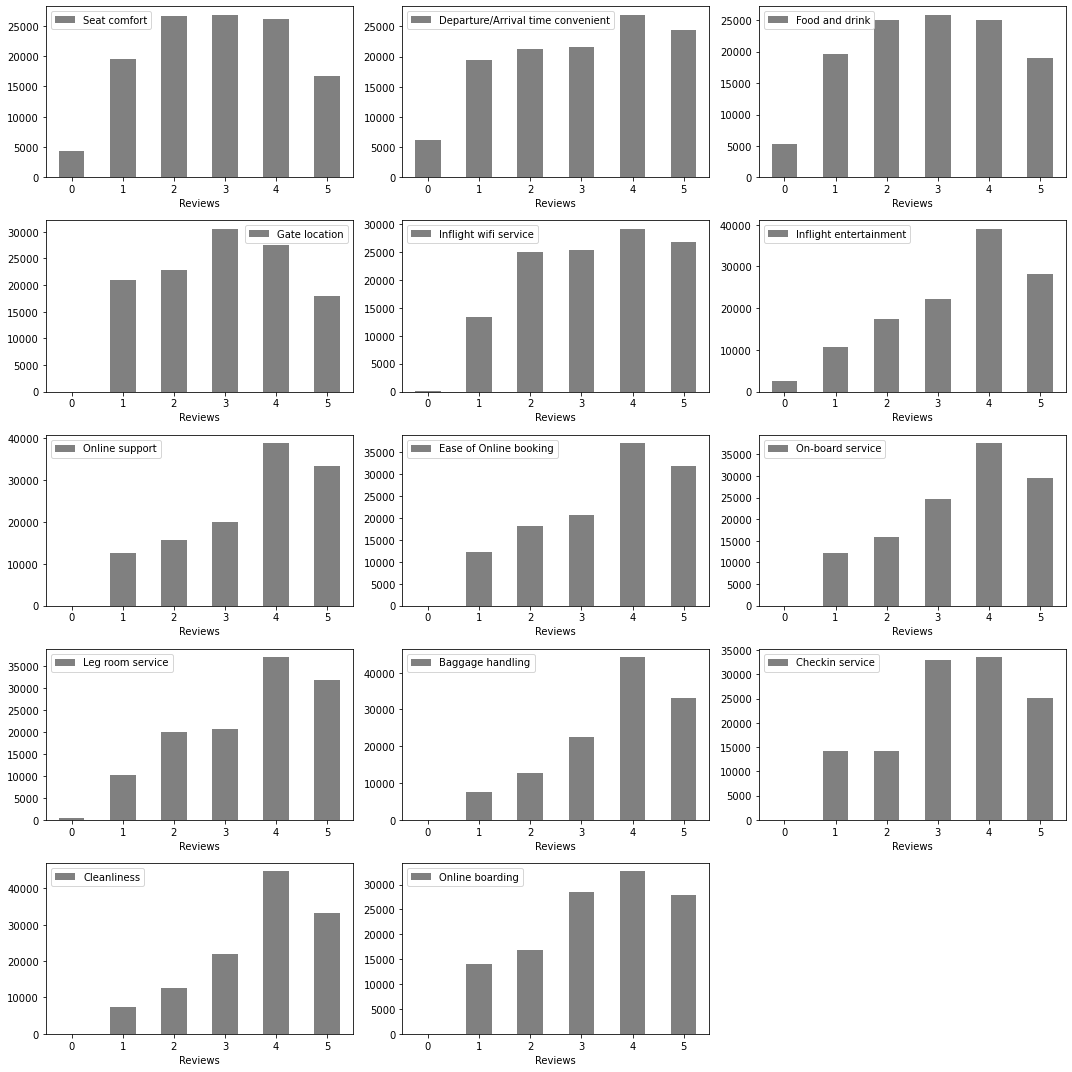

In [3]:
# Dataframe of count of Reviews for each of the services #
df_hist = df_cleaned.drop(['id', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Satisfied or Dissatisfied'], axis = 1)
df_hist = df_hist.apply(pd.Series.value_counts).fillna(0)
df_hist.index.name = 'Reviews'

# Plot bar plots of Reviews #

fig, axes = plt.subplots(nrows=5, ncols=3)

for i, ax in enumerate(axes.reshape(-1)):
    if i < (len(df_hist.columns)):
        df_hist[[df_hist.columns[i]]].plot(ax=ax, kind="bar", rot=0, figsize=(15,15), color = 'gray')

plt.legend(handles=[fig], bbox_to_anchor=(1.05, 1), loc='center')
fig.delaxes(axes[4][2])
plt.tight_layout()
plt.show()

In [4]:
df_descriptive = df_cleaned.drop(['id','Gender','Type of Travel', 'Class', 'Satisfied or Dissatisfied'], axis = 1)
df_descriptive.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,120033.000000,119676.000000
mean,41.639524,1960.026334,2.839386,2.972683,2.856156,2.989886,3.257129,3.406305,3.539752,3.484933,3.473995,3.494064,3.691052,3.343722,3.701166,3.362842,14.653737,15.015183
std,13.490228,1041.181900,1.395028,1.528209,1.444362,1.311541,1.317031,1.337034,1.297654,1.301803,1.270208,1.289828,1.163105,1.259643,1.157641,1.294541,37.809074,38.164054
min,18.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1302.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,41.000000,1906.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,52.000000,2540.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# Drop non-numerical data #
df_iqr = df_cleaned.drop(['id','Gender', 'Age', 'Type of Travel', 'Class', 'Satisfied or Dissatisfied'], axis = 1) 

Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

Flight Distance                      1238.0
Seat comfort                            2.0
Departure/Arrival time convenient       2.0
Food and drink                          2.0
Gate location                           2.0
Inflight wifi service                   2.0
Inflight entertainment                  2.0
Online support                          2.0
Ease of Online booking                  3.0
On-board service                        1.0
Leg room service                        3.0
Baggage handling                        2.0
Checkin service                         1.0
Cleanliness                             2.0
Online boarding                         2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
dtype: float64


Text(0.5, 1.0, 'Heatmap - Customer Satisfaction With Respect To Other Variables')

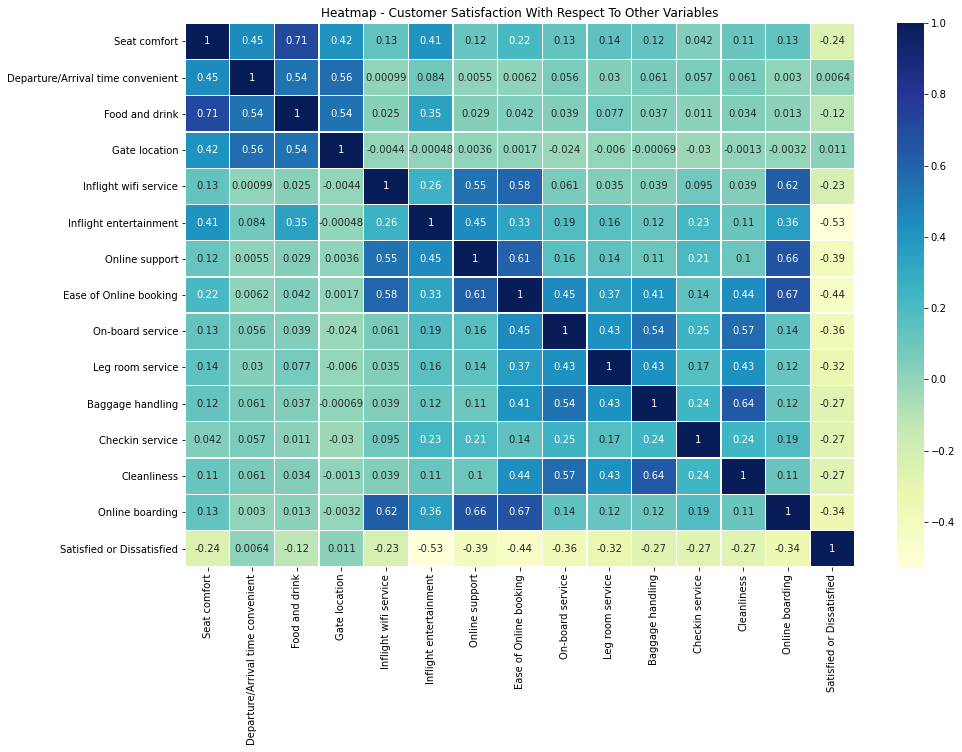

In [7]:
# Dataframe of independent and dependent variables and calculate correlation coefficient #
df_corr = df_cleaned.drop(['id', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis = 1)
correlation = df_corr.corr()

# Plot correlation coefficients into heatmap # 
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0.25, cmap="YlGnBu")
plt.title('Heatmap - Customer Satisfaction With Respect To Other Variables')

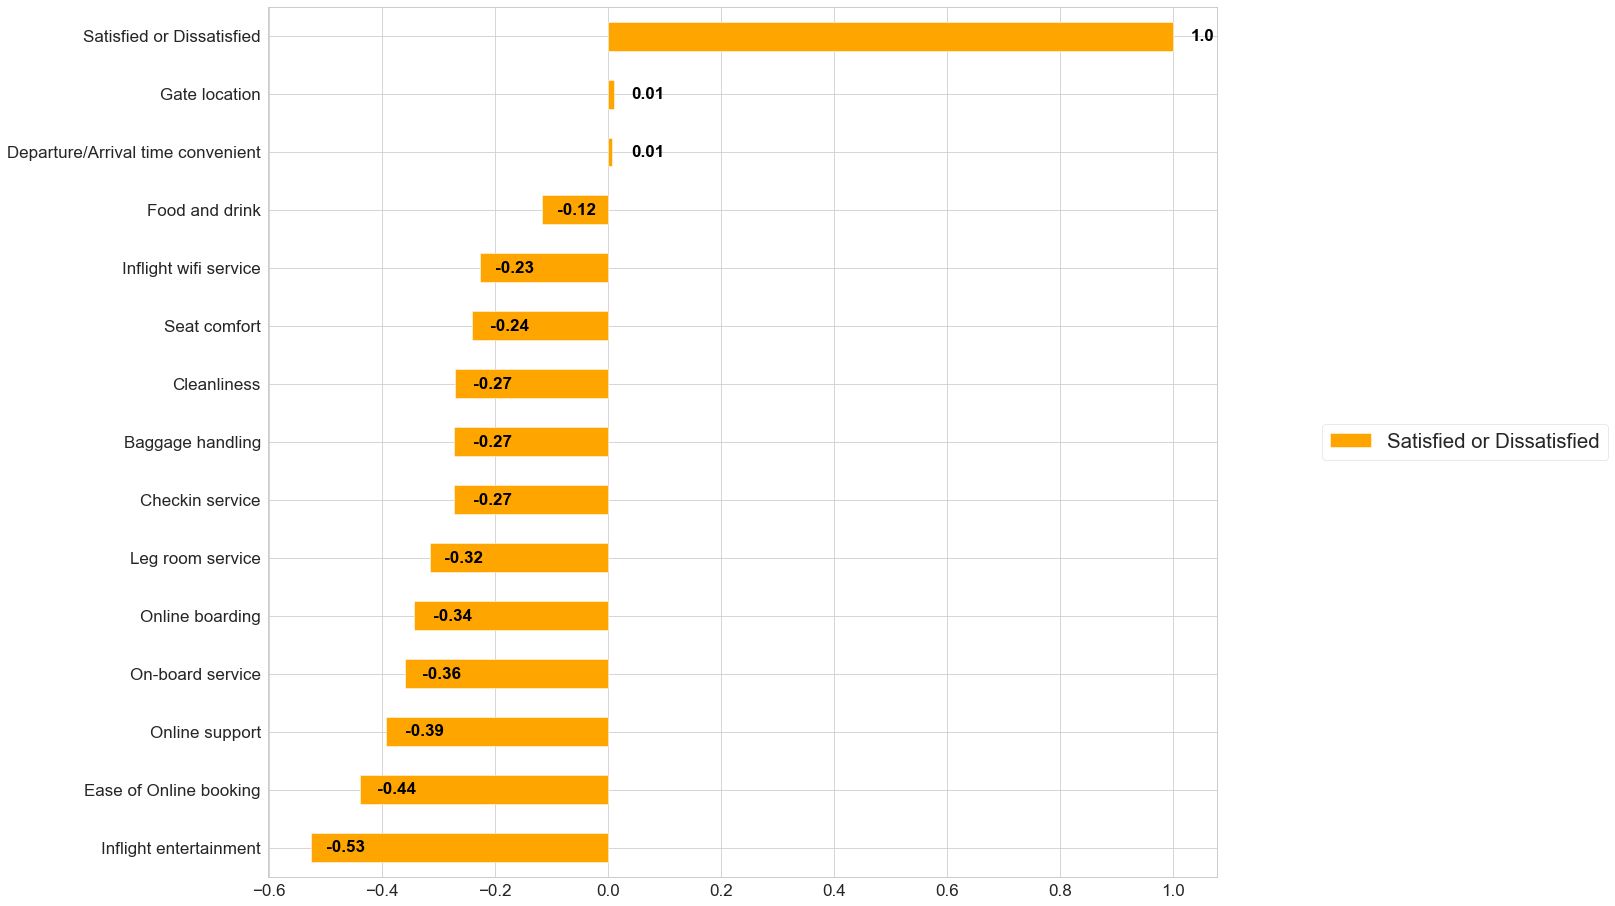

In [669]:
# Sort correlation of independent variables w.r.t dependent variable and creating horizontal bar plot #
plt.rcParams["figure.figsize"] = (17, 16)
last_col = round(correlation.iloc[:, 14], 2)
correlation.sort_values('Satisfied or Dissatisfied',inplace=True)

barplot = correlation[["Satisfied or Dissatisfied"]].plot(kind='barh', color = 'orange')

# Horizontal Barplot #
plt.legend(loc = 'center left', bbox_to_anchor=(1.1,0.5), fontsize = 'large')
plt.rc('font', size=17) 

# Add values of correlation coefficients #
for r, s in enumerate(last_col):
    barplot.text(s + 0.03, r , str(s), color='black', fontweight='bold', va='center')
    


### 4. Classification Model 1: Logistic Regression and Accuracy 


**Steps:**

* Split the 70% of data into train set and 30% into test set. Training set will be used to train the model & test set will be used to assess the performance
* Trained Logistic Regression Model and generated prediction for test set
* Compared predictions with true labels of test to assess the performance
* Run confusion matrix




***Insights*** 
* Accuracy score of Logistic Model is 81% which tells us that the model is a good fit for the data. However there is still some room for improvement and therefore we would like to explore another classification model.     
* TP: 12,305,  TN: 16,825,  FP: 3300,  FN: 3580
* High number of TP & TN justify the higher accuracy score of the model


In [6]:
# Defining independent and dependent variables #
X = df_cleaned[['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]
Y = df_cleaned['Satisfied or Dissatisfied']

# Splitting model and running Logistic Regression model #
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting for test set #
y_pred = logreg.predict(X_test)

y_true = y_test
print(classification_report(y_true, y_pred))
print('Accuracy Score of Logistic Regression model:', round(accuracy_score(y_true, y_pred),2)) 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     20125
           1       0.79      0.77      0.78     15885

    accuracy                           0.81     36010
   macro avg       0.81      0.81      0.81     36010
weighted avg       0.81      0.81      0.81     36010

Accuracy Score of Logistic Regression model: 0.81


Predicted      0      1
Actual                 
0          16825   3300
1           3580  12305


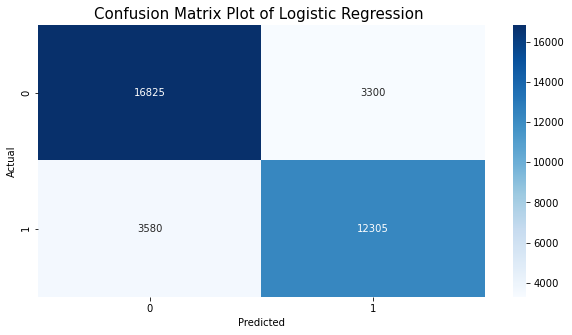

In [12]:
# Run confusion matrix #
confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

# Plot confusion matrix in the form of heatmap #
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix Plot of Logistic Regression ', fontsize=15)
plt.show()


### 5. Classification Model 2: Decision Tree & Accuracy

***Steps***
* Split the 70% of data into train set and 30% into test set. Training set will be used to train the model & test set will be used to assess the performance
* Trained Decision Tree model and generated prediction for test set
* Compared predictions with true labels of test to assess the performance
* Run confusion matrix

***Insights***
* Accuracy score of Decision Tree model is 93% which tells us that the model is a better fit for the data than the Logistic Regression model. Therefore, we would like to deploy this model into production      
* TP: 14,414  TN: 19,037  FP: 1088  FN: 1471
* High number of TP & TN justify the higher accuracy score of the model


In [7]:
# Splitting model #
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=0)

# Splitting model and running Decision Tree model #
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)

# Predicting for test set #
y_pred1 = clf.predict(X_test1)

y_true1 = y_test1
print(classification_report(y_true1, y_pred1))
print('Accuracy Score of Decision Tree model:', round(accuracy_score(y_true1, y_pred1),2)) 


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     20125
           1       0.93      0.91      0.92     15885

    accuracy                           0.93     36010
   macro avg       0.93      0.93      0.93     36010
weighted avg       0.93      0.93      0.93     36010

Accuracy Score of Decision Tree model: 0.93


Predicted      0      1
Actual                 
0          19037   1088
1           1471  14414


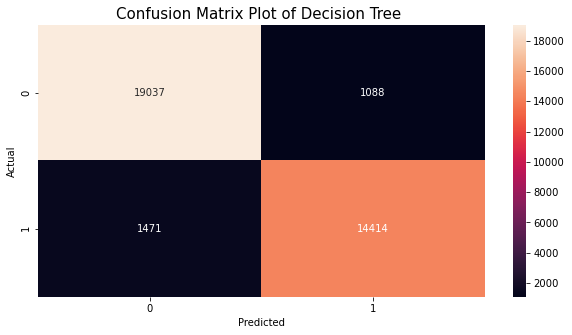

In [15]:
# Run confusion matrix #
confusion_matrix1 = pd.crosstab(y_true1, y_pred1, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix1)

# Plot confusion matrix in the form of heatmap #
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix1, annot=True, fmt='g')
plt.title('Confusion Matrix Plot of Decision Tree ', fontsize=15)
plt.show()


### 6. Classification Feature Importance


***Tasks***
* Ran feature_importances algorithm on Decision Tree model to calculate the relative importance of features (Best-Wings' services in this case)
* Bar plot of the feature importance in descending order

***Insights***
* Inflight Entertainment, Seat Comfort and Ease of Online Booking are the 3 most important features which helped decision tree in its classification
* Consequently, these features/services are the top 3 contributors of customer dissatisfaction


    Feature Importance                      Feature Names
5             0.402786             Inflight entertainment
0             0.172867                       Seat comfort
7             0.068264             Ease of Online booking
3             0.038012                      Gate location
4             0.037564              Inflight wifi service
9             0.036540                   Leg room service
11            0.036536                    Checkin service
1             0.035151  Departure/Arrival time convenient
8             0.030532                   On-board service
13            0.030168                    Online boarding
6             0.028611                     Online support
12            0.028495                        Cleanliness
2             0.027931                     Food and drink
10            0.026542                   Baggage handling


<Figure size 1080x360 with 0 Axes>

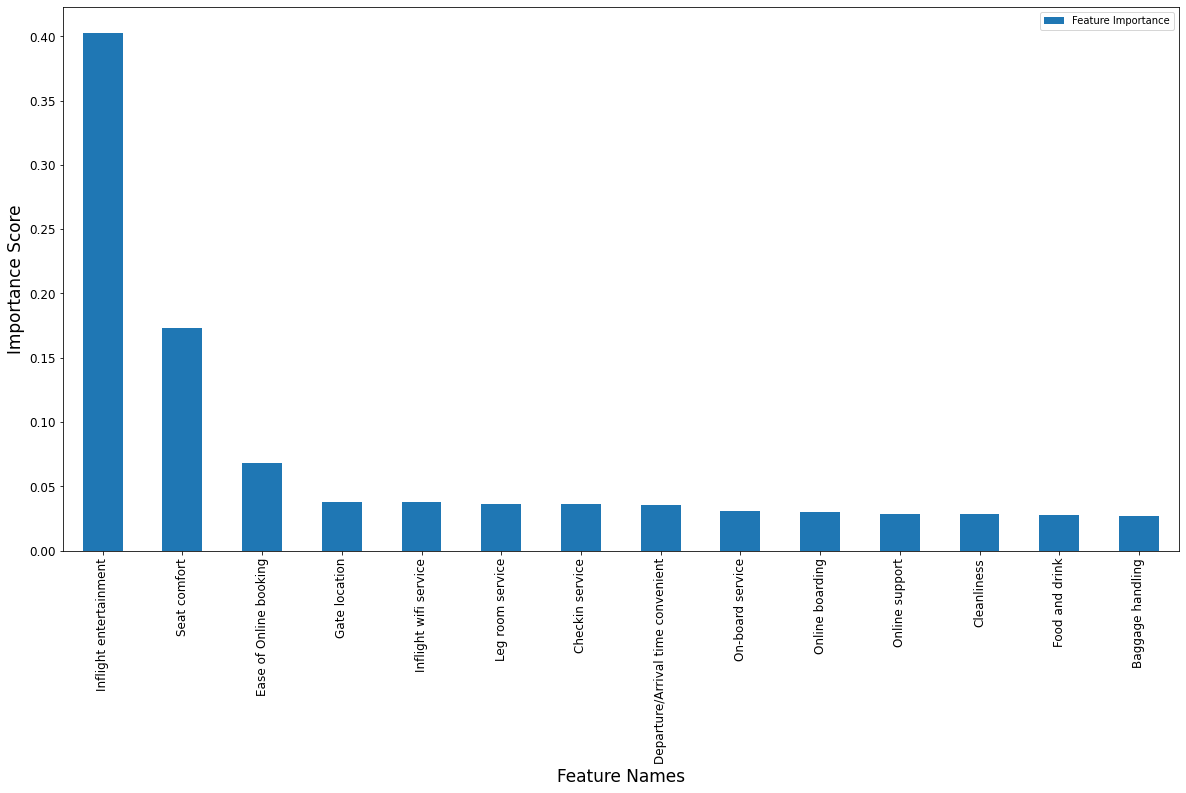

In [9]:
# Extract feature names from df_cleaned #
feature_names = df_cleaned.drop(['id', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Satisfied or Dissatisfied'], axis = 1)
features = list(feature_names.columns.values)
df_features = pd.DataFrame(features)


# Run feature_importances_ algorithm and making dataframe of feature names & their importance number#
importance = clf.feature_importances_
df_importance = pd.DataFrame(importance, columns = ['Feature Importance'])
df_importance['Feature Names'] = df_features
df_importance.sort_values('Feature Importance', ascending = False, inplace=True)
print(df_importance)

# Bar plot of feature importance #
x_ticks_labels = list(df_importance[df_importance.columns[-1]])
plt.figure(figsize=(15,5))
df_importance.plot.bar(x = 'Feature Names', y = 'Feature Importance', figsize = (20, 10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Feature Names", fontsize=17)
plt.ylabel("Importance Score", fontsize=17)
plt.show()


### 7. Add Noise (randomly generated data) to the original data

***Tasks***
* Added 50,000 rows for all columns using randint & choice functions of random module
* Concatenated noise data to cleaned data and saved it in a new dataframe df_combined
* Ran Decision Tree model on df_combined


***Insight***
* Adding random data (noise) deteriorates the accuracy of our original Decision Tree model from 93% to 80% and therefore it would not be advisable to add any random data. In order to improve the accuracy of the combined data, further re-testing of the model would be required

In [416]:
# List choices for non-numerical columns #
gender = ('Male', 'Female')
classtype = ('Business', 'Eco', 'Eco Plus')
travel = ('Personal Travel', 'Business travel')

# Generate random data #
df_noise = pd.DataFrame({'id':np.random.randint(129860,140000,size=(50000)), 
                     'Gender':np.random.choice(gender, size=(50000)),
                     'Age':np.random.randint(18, 80,size=(50000)),
                     'Type of Travel':np.random.choice(travel, size=(50000)),
                     'Class':np.random.choice(classtype, size=(50000)),
                     'Flight Distance':np.random.randint(100,8000,size=(50000)),
                     'Seat comfort':np.random.randint(0,6,size=(50000)),
                     'Departure/Arrival time convenient':np.random.randint(0,6,size=(50000)),
                     'Food and drink':np.random.randint(0,6,size=(50000)),
                     'Gate location':np.random.randint(0,6,size=(50000)),
                     'Inflight wifi service':np.random.randint(0,6,size=(50000)),
                     'Inflight entertainment':np.random.randint(0,6,size=(50000)),
                     'Online support':np.random.randint(0,6,size=(50000)),
                     'Ease of Online booking':np.random.randint(0,6,size=(50000)),
                     'On-board service':np.random.randint(0,6,size=(50000)),
                     'Leg room service':np.random.randint(0,6,size=(50000)),
                     'Baggage handling':np.random.randint(0,6,size=(50000)),
                     'Checkin service':np.random.randint(0,6,size=(50000)),
                     'Cleanliness':np.random.randint(0,6,size=(50000)),
                     'Online boarding':np.random.randint(0,6,size=(50000)),
                     'Departure Delay in Minutes':np.random.randint(0,1000,size=(50000)),
                     'Arrival Delay in Minutes':np.random.randint(0,1000,size=(50000)),
                     'Satisfied or Dissatisfied':np.random.randint(0,2,size=(50000))
                     
                   })
df_noise


,id,Gender,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied or Dissatisfied
0,137203,Female,71,Personal Travel,Eco,6555,4,3,4,4,...,0,2,0,0,0,3,2,685,954,1
1,136622,Female,48,Business travel,Business,2337,2,4,4,5,...,4,5,1,3,3,3,3,893,60,0
2,133071,Female,39,Personal Travel,Business,7246,4,0,5,1,...,2,5,2,4,2,3,1,831,86,1
3,138781,Male,79,Business travel,Eco Plus,430,1,0,0,0,...,0,0,1,3,0,0,3,47,958,0
4,134916,Female,20,Personal Travel,Business,7097,4,3,5,4,...,2,2,3,3,4,3,3,822,984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,132466,Male,32,Personal Travel,Eco,2834,3,1,5,5,...,2,2,4,3,4,4,1,247,724,1
49996,131944,Female,44,Business travel,Eco,6660,0,1,2,5,...,5,1,1,3,2,5,0,547,945,0
49997,131731,Female,59,Personal Travel,Eco Plus,2952,3,2,4,4,...,2,1,1,0,3,2,1,292,389,0
49998,138128,Male,48,Personal Travel,Business,3294,0,0,0,3,...,0,3,3,2,3,5,5,836,238,0


In [840]:
# Concatenating noise and original data #
combined = [df_cleaned, df_noise]
df_combined = pd.concat(combined)
df_combined

X1 = df_combined[['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]
Y1 = df_combined['Satisfied or Dissatisfied']


# Decision Tree Model on new data #
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Y1, test_size=0.3, random_state=0)

clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train2,y_train2)
y_pred2 = clf1.predict(X_test2)

y_true2 = y_test2
print(classification_report(y_true2, y_pred2))
print('Accuracy Score of new Decision Tree model:', round(accuracy_score(y_true2, y_pred2),2)) 


              precision    recall  f1-score   support

           0       0.81      0.82      0.82     27820
           1       0.78      0.78      0.78     23190

    accuracy                           0.80     51010
   macro avg       0.80      0.80      0.80     51010
weighted avg       0.80      0.80      0.80     51010

Accuracy Score of new Decision Tree model: 0.8


### 8. Conclusion

* Average rating across all the services is 3.25. Cleanliness is the best rated service since it has the highest average rating of 3.70, followed by Baggage handling 3.69 and Online Support 3.54
* Except Departure/Arrival Time Convenient and Gate location, all service ratings are negatively correlated with customer's dissatisfaction which means that as the service ratings go down, level of customer dissatisfaction goes up
* Decision Tree Classification model is a better fit for the data with the accuracy score of 93% and higher number of TP & TN predicted
* Given the feature importance scores, the top 3 services that need to be prioritized in terms of improvement are Inflight Entertainment, Seat Comfort & Ease of Online Booking with importance scores of 0.40, 0.17 and 0.07 respectively   